In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy
from tqdm import tqdm
# import pickle

import sys
sys.path.append('../functions')
import hexbin_functions as hexfunc

/nethome/6525954/.conda/envs/nemo-ensemble/lib/python3.12/site-packages/h3/unstable/__init__.py:4: UserWarning: Modules under `h3.unstable` are experimental, and may change at any time.
  warnings.warn(


In [2]:
def entropy(Pdf):
    # Pdf = Pdf / np.nansum(Pdf)  # Normalize Pdf to sum to 1, ignoring NaNs
    # Replace zeros with a very small number to avoid log(0)
    Pdf_safe = np.where(Pdf > 0, Pdf, np.finfo(float).eps)
    return -np.nansum(Pdf_safe * np.log(Pdf_safe))

def information(Pdf):
    Pdf_safe = np.where(Pdf > 0, Pdf, np.finfo(float).eps)
    return - Pdf_safe * np.log2(Pdf_safe)

def Shannon_entropy(Pdf):
    # Pdf = Pdf / np.nansum(Pdf)  # Normalize Pdf to sum to 1, ignoring NaNs
    # Replace zeros with a very small number to avoid log(0)
    Pdf_safe = np.where(Pdf > 0, Pdf, np.finfo(float).eps)
    return -np.nansum(Pdf_safe * np.log2(Pdf_safe))

In [3]:
location = 'Cape_Hatteras'
member = 1
delta_r = 0.1
week = 1
subset = 1

file_path_AX = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/{location}_all/P_dr{delta_r*100:03.0f}_all_s{subset}.nc"
P_AX = xr.open_dataset(file_path_AX)

In [4]:
hex_grid = hexfunc.int_to_hex(P_AX.hexint.values)
hexbin_grid = hexfunc.hexGrid(hex_grid, h3_res=3)

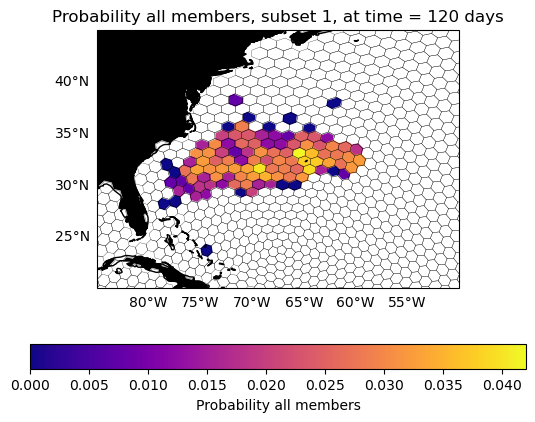

In [5]:

# Plot NA_domain on a map
depth = 0
fig = plt.figure()
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.set_extent([-85, -50, 20, 45], crs=cartopy.crs.PlateCarree())
ax.coastlines()

ax.add_feature(cartopy.feature.LAND, zorder=0, color='black')
gl = ax.gridlines(draw_labels=True, zorder=0, linestyle='--', linewidth=0.5, alpha=0.)
gl.top_labels = False
gl.right_labels = False


t = 120
t_gap = 0

im = hexbin_grid.pcolorhex(P_AX['probability'][:, t].values, ax=ax, cmap='plasma', draw_edges=True)
ax.set_title(f'Probability all members, subset {1}, at time = {t} days')


cbar = plt.colorbar(im, ax=ax, orientation='horizontal', label=f'Probability all members')


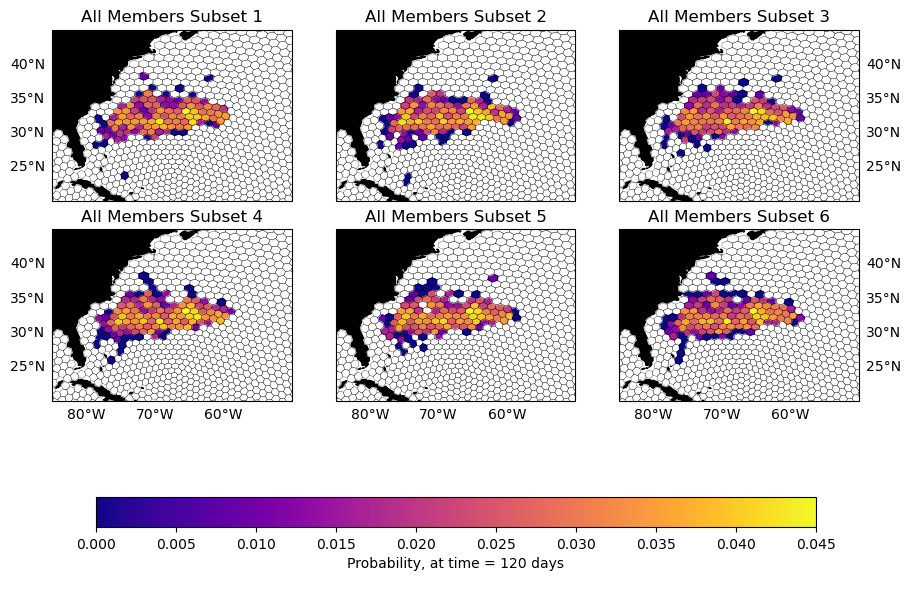

In [6]:
member = 1

ncol = 3
nrow = 3
fig, axs = plt.subplots(ncols=ncol, nrows=nrow, figsize=(9, 6),
                       subplot_kw={'projection': cartopy.crs.PlateCarree()},
                       sharey=True, constrained_layout=True)

axs = axs.reshape(ncol*nrow)
t = 120

for i in range(0, 6):
    
    file_path_AX = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/{location}_all/P_dr{delta_r*100:03.0f}_all_s{i+1}.nc"
    P_AX = xr.open_dataset(file_path_AX)
    
    hex_grid = hexfunc.int_to_hex(P_AX.hexint.values)
    hexbin_grid = hexfunc.hexGrid(hex_grid, h3_res=3)
    
    axs[i].set_extent([-85, -50, 20, 45], crs=cartopy.crs.PlateCarree())
    axs[i].add_feature(cartopy.feature.LAND, zorder=0, color='black')
    
    axs[i].set_title(f'All Members Subset {i+1}')
    gl = axs[i].gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True,
                         linewidth=0.5, color='gray', alpha=0.)

    im = hexbin_grid.pcolorhex(P_AX['probability'][:, t].values, ax=axs[i], cmap='plasma', draw_edges=True)

    if i in [1, 2, 4, 5]:
        gl.left_labels = False

    if i < 3:
        gl.bottom_labels = False

    gl.top_labels = False
    gl.right_labels = False

    if i in [2, 5]:
        gl.right_labels = True

for i in range(ncol*nrow - nrow, ncol*nrow):
    axs[i].axis('off')
    
bar_ax = fig.add_axes([0.1, 0.13, 0.8, 0.05])
cbar = fig.colorbar(im, cax=bar_ax, orientation='horizontal', label=f'Probability, at time = {t} days')

Text(0.5, 1.0, 'Shanon Entropy of the Subsets of All Members')

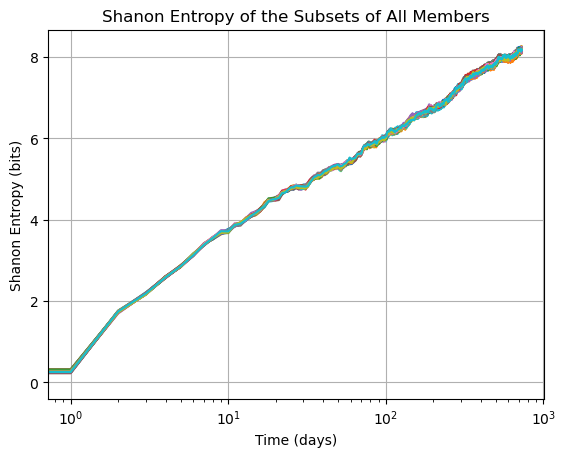

In [7]:
for i in range(1, 51):
    
    file_path_AX = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/{location}_all/P_dr{delta_r*100:03.0f}_all_s{i}.nc"
    P_AX = xr.open_dataset(file_path_AX)

    plt.semilogx(P_AX['entropy'][:])

# plt.legend()
plt.ylabel('Shanon Entropy (bits)')
plt.xlabel('Time (days)')
plt.grid()
plt.title('Shanon Entropy of the Subsets of All Members')

In [8]:
entropy_all = np.zeros((50, len(P_AX['entropy'].values)))
    
for i in range(1, 51):
    
    file_path_AX = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/{location}_all/P_dr{delta_r*100:03.0f}_all_s{i}.nc"
    P_AX = xr.open_dataset(file_path_AX)
    
    entropy_all[i-1, :] = P_AX['entropy'].values

mean_entropy_all = np.mean(entropy_all, axis=0)
std_entropy_all = np.std(entropy_all, axis=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


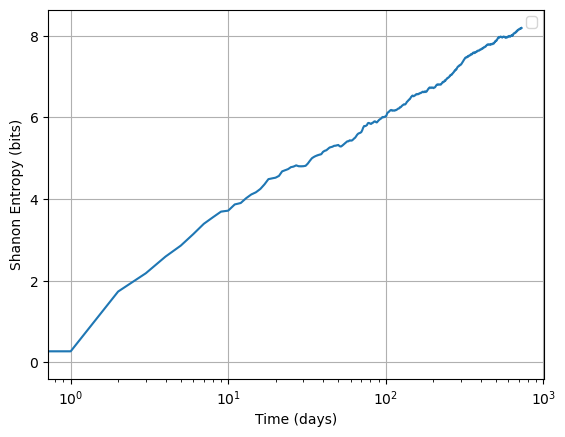

In [12]:
plt.semilogx(mean_entropy_all)
plt.fill_between(np.arange(0, 730), mean_entropy_all - std_entropy_all, mean_entropy_all + std_entropy_all, alpha=0.2)

plt.legend()
plt.ylabel('Shanon Entropy (bits)')
plt.xlabel('Time (days)')
plt.grid()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


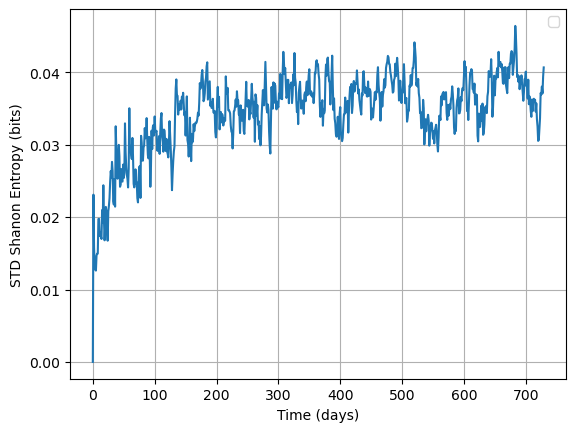

In [13]:
plt.plot(std_entropy_all)
# plt.fill_between(np.arange(0, 730), mean_entropy_all - std_entropy_all, mean_entropy_all + std_entropy_all, alpha=0.2)

plt.legend()
plt.ylabel('STD Shanon Entropy (bits)')
plt.xlabel('Time (days)')
plt.grid()


# Temporal analysis

In [10]:
location = 'Cape_Hatteras'
member = 42
week = 1

# file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/{location}_spatial/P_dr{delta_r*100:03.0f}_m{member:03d}.zarr"
file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/{location}_temporal/P_W{week:01d}_m{member:03d}.nc"

P_m = xr.open_dataset(file_path)

In [11]:
hex_grid = hexfunc.int_to_hex(P_m.hexint.values)
hexbin_grid = hexfunc.hexGrid(hex_grid, h3_res=3)

In [12]:
# get dimensions
Members = np.arange(1, 51)
delta_r_ranges = np.linspace(1, 10, 10)/10
week_range = np.arange(1, 7)
time_array = P_m.time.values
bin_length = P_m.hexint.shape[0]

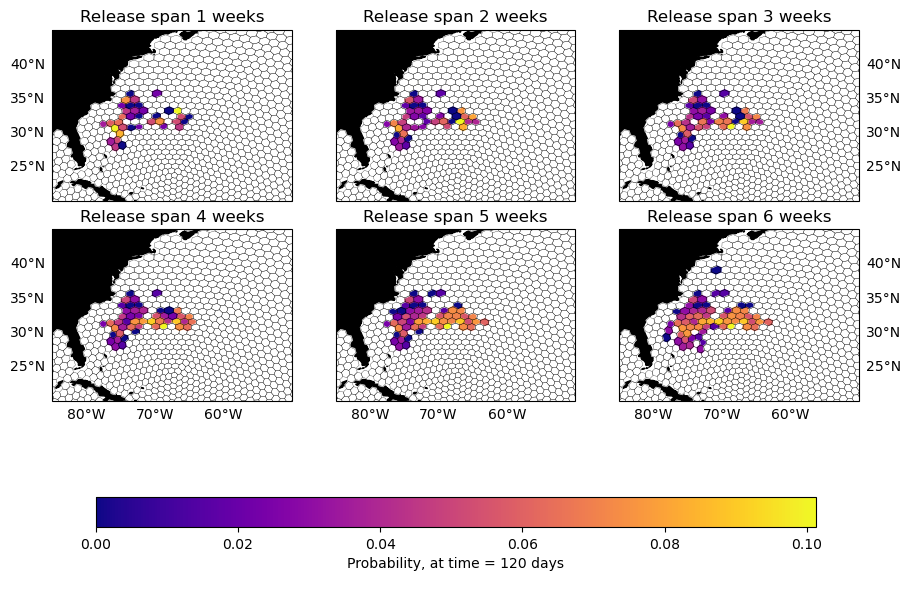

In [14]:
member = 42

ncol = 3
nrow = 3
fig, axs = plt.subplots(ncols=ncol, nrows=nrow, figsize=(9, 6),
                       subplot_kw={'projection': cartopy.crs.PlateCarree()},
                       sharey=True, constrained_layout=True)

axs = axs.reshape(ncol*nrow)
t = 120

for i, week in enumerate(week_range):
    file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/{location}_temporal/P_W{week:01d}_m{member:03d}.nc"
    P_m = xr.open_dataset(file_path)
    
    axs[i].set_extent([-85, -50, 20, 45], crs=cartopy.crs.PlateCarree())
    axs[i].add_feature(cartopy.feature.LAND, zorder=0, color='black')
    
    axs[i].set_title(f'Release span {week} weeks')
    gl = axs[i].gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True,
                         linewidth=0.5, color='gray', alpha=0.)

    im = hexbin_grid.pcolorhex(P_m['probability'][:, t].values, ax=axs[i], cmap='plasma', draw_edges=True)

    if i in [1, 2, 4, 5]:
        gl.left_labels = False

    if i < 3:
        gl.bottom_labels = False

    gl.top_labels = False
    gl.right_labels = False

    if i in [2, 5]:
        gl.right_labels = True

for i in range(ncol*nrow - nrow, ncol*nrow):
    axs[i].axis('off')
    
bar_ax = fig.add_axes([0.1, 0.13, 0.8, 0.05])
cbar = fig.colorbar(im, cax=bar_ax, orientation='horizontal', label=f'Probability, at time = {t} days')

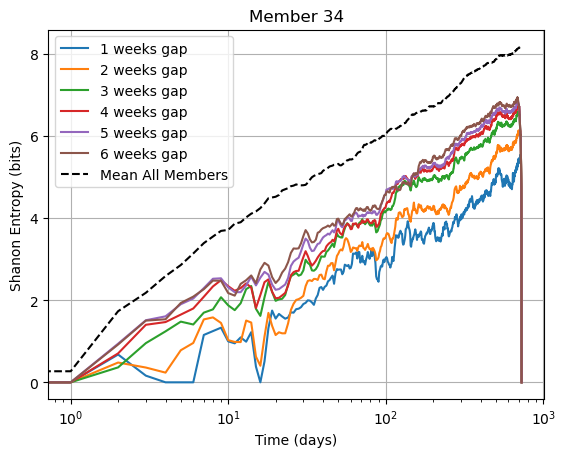

In [82]:


# for i, dt in enumerate(delta_t_array):
#     plt.plot(P_m['entropy'][i, :1300], label=f'{dt} hrs gap')

member = 34

for i, week in enumerate(week_range):
    
    # file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/{location}_spatial/P_dr{delta_r*100:03.0f}_m{member:03d}.zarr"
    file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/{location}_temporal/P_W{week:01d}_m{member:03d}.zarr"
    P_m = xr.open_zarr(file_path)
    plt.semilogx(P_m['entropy'][:], label=f'{week} weeks gap')
    
plt.plot(mean_entropy_all, ls='--', color='black', label='Mean All Members')

plt.legend()
plt.ylabel('Shanon Entropy (bits)')
plt.xlabel('Time (days)')
plt.title(f'Member {member}')
plt.grid()

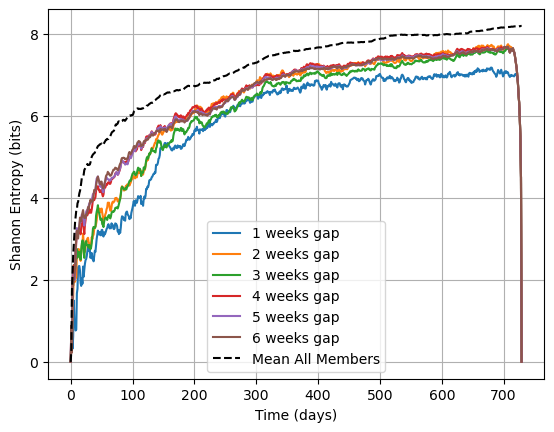

In [81]:
# for i, dt in enumerate(delta_t_array):
#     plt.plot(P_m['entropy'][i, :1300], label=f'{dt} hrs gap')

for i, week in enumerate(week_range):
    
    # file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/{location}_spatial/P_dr{delta_r*100:03.0f}_m{member:03d}.zarr"
    file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/{location}_temporal/P_W{week:01d}_m{member:03d}.zarr"
    P_m = xr.open_zarr(file_path)
    plt.plot(P_m['entropy'][:], label=f'{week} weeks gap')
    
plt.plot(mean_entropy_all, ls='--', color='black', label='Mean All Members')

plt.legend()
plt.ylabel('Shanon Entropy (bits)')
plt.xlabel('Time (days)')
plt.grid()

(0.0, 10.0)

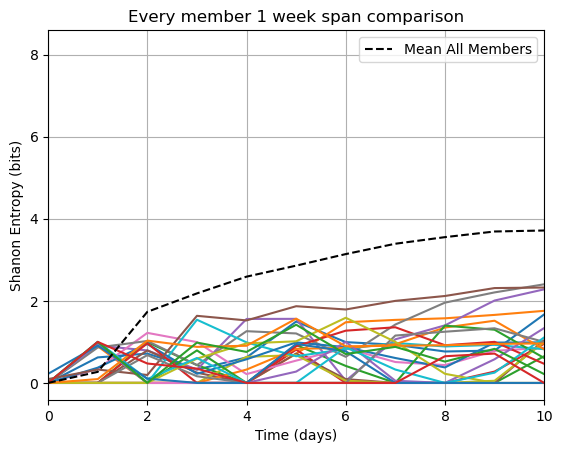

In [20]:
# for i, dt in enumerate(delta_t_array):
#     plt.plot(P_m['entropy'][i, :1300], label=f'{dt} hrs gap')
week = 1

member_list = [1,2,3,4,9,10,11,12,17,18,19,20,25,26,27,28,33,34,35,36,42,43,44,45]

# for i, delta_r in enumerate(delta_r_ranges):
# for member in range(1, 51):
for member in member_list:
    
    file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/{location}_temporal/P_W{week:01d}_m{member:03d}.zarr"
    P_m = xr.open_zarr(file_path)
    plt.plot(P_m['entropy'][:])
    
# plt.semilogx(P_AX['entropy'][:], ls='--', color='black', label='All members')
    
plt.plot(mean_entropy_all, ls='--', color='black', label='Mean All Members')

plt.legend()
plt.ylabel('Shanon Entropy (bits)')
plt.xlabel('Time (days)')
plt.title(f'Every member {week} week span comparison')
plt.grid()
plt.xlim(0, 10)

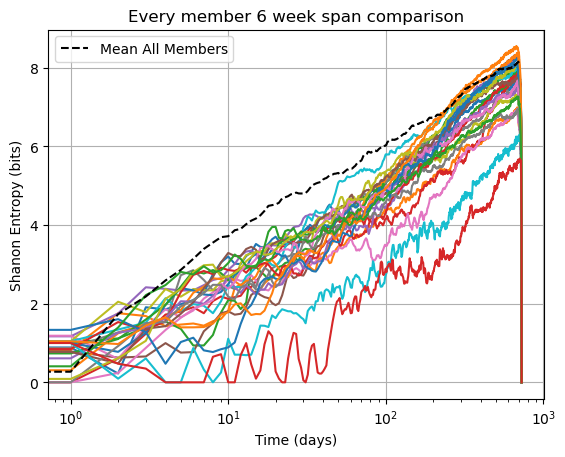

In [84]:
# for i, dt in enumerate(delta_t_array):
#     plt.plot(P_m['entropy'][i, :1300], label=f'{dt} hrs gap')
week = 6

member_list = [1,2,3,4,9,10,11,12,17,18,19,20,25,26,27,28,33,34,35,36,42,43,44,45]

# for i, delta_r in enumerate(delta_r_ranges):
# for member in range(1, 51):
for member in member_list:
    
    file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/{location}_temporal/P_W{week:01d}_m{member:03d}.zarr"
    P_m = xr.open_zarr(file_path)
    plt.plot(P_m['entropy'][:])

plt.semilogx(mean_entropy_all, ls='--', color='black', label='Mean All Members')

plt.legend()
plt.ylabel('Shanon Entropy (bits)')
plt.xlabel('Time (days)')
plt.title(f'Every member {week} week span comparison')
plt.grid()

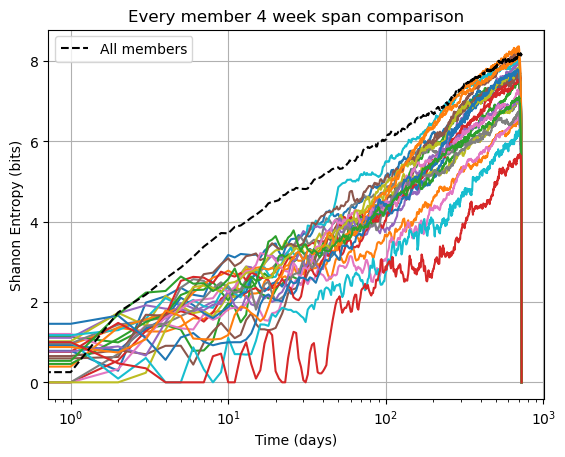

In [76]:
# for i, dt in enumerate(delta_t_array):
#     plt.plot(P_m['entropy'][i, :1300], label=f'{dt} hrs gap')
week = 4

member_list = [1,2,3,4,9,10,11,12,17,18,19,20,25,26,27,28,33,34,35,36,42,43,44,45]

# for i, delta_r in enumerate(delta_r_ranges):
# for member in range(1, 51):
for member in member_list:
    
    file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/{location}_temporal/P_W{week:01d}_m{member:03d}.zarr"
    # print(file_path)
    P_m = xr.open_zarr(file_path)
    plt.plot(P_m['entropy'][:])
    
plt.semilogx(P_AX['entropy'][:], ls='--', color='black', label='All members')

plt.legend()
plt.ylabel('Shanon Entropy (bits)')
plt.xlabel('Time (days)')
plt.title(f'Every member {week} week span comparison')
plt.grid()

# Spatial analysis

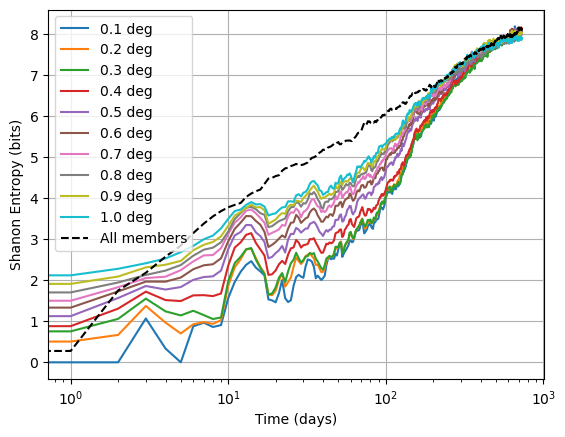

In [103]:


# for i, dt in enumerate(delta_t_array):
#     plt.plot(P_m['entropy'][i, :1300], label=f'{dt} hrs gap')

for i, delta_r in enumerate(delta_r_ranges):
    
    file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/{location}_spatial/P_dr{delta_r*100:03.0f}_m{member:03d}.zarr"
    P_m = xr.open_zarr(file_path)
    plt.plot(P_m['entropy'][:], label=f'{delta_r:.1f} deg')
    
plt.semilogx(P_AX['entropy'][:], ls='--', color='black', label='All members')

plt.legend()
plt.ylabel('Shanon Entropy (bits)')
plt.xlabel('Time (days)')
plt.grid()

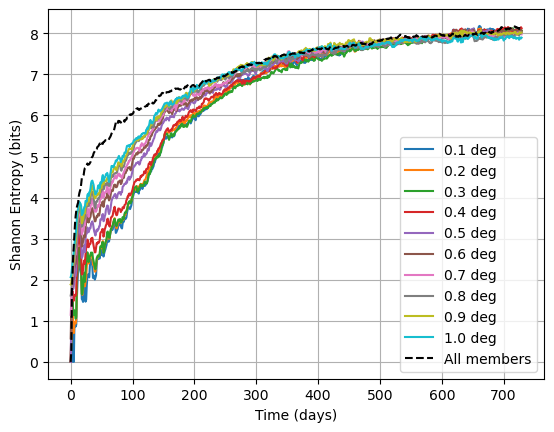

In [101]:


# for i, dt in enumerate(delta_t_array):
#     plt.plot(P_m['entropy'][i, :1300], label=f'{dt} hrs gap')

for i, delta_r in enumerate(delta_r_ranges):
    
    file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/{location}_spatial/P_dr{delta_r*100:03.0f}_m{member:03d}.zarr"
    P_m = xr.open_zarr(file_path)
    plt.plot(P_m['entropy'][:], label=f'{delta_r:.1f} deg')
    
plt.plot(P_AX['entropy'][:], ls='--', color='black', label='All members')

plt.legend()
plt.ylabel('Shanon Entropy (bits)')
plt.xlabel('Time (days)')
plt.grid()

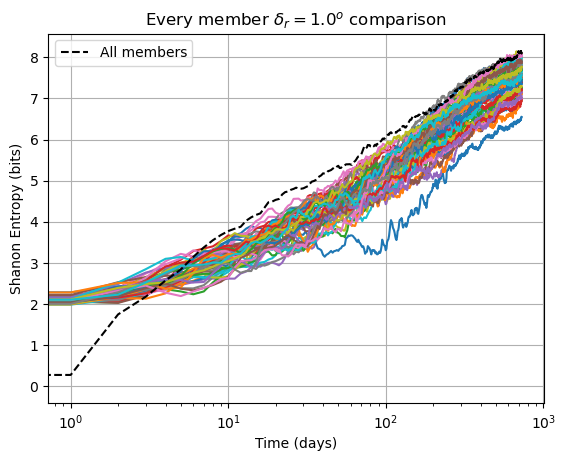

In [107]:
# for i, dt in enumerate(delta_t_array):
#     plt.plot(P_m['entropy'][i, :1300], label=f'{dt} hrs gap')
delta_r = 1.

# for i, delta_r in enumerate(delta_r_ranges):
for member in range(1, 51):
    
    file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/{location}_spatial/P_dr{delta_r*100:03.0f}_m{member:03d}.zarr"
    P_m = xr.open_zarr(file_path)
    plt.plot(P_m['entropy'][:])
    
plt.semilogx(P_AX['entropy'][:], ls='--', color='black', label='All members')

plt.legend()
plt.ylabel('Shanon Entropy (bits)')
plt.xlabel('Time (days)')
plt.title(f'Every member $\\delta_r = ${delta_r:.1f}$^o$ comparison')
plt.grid()

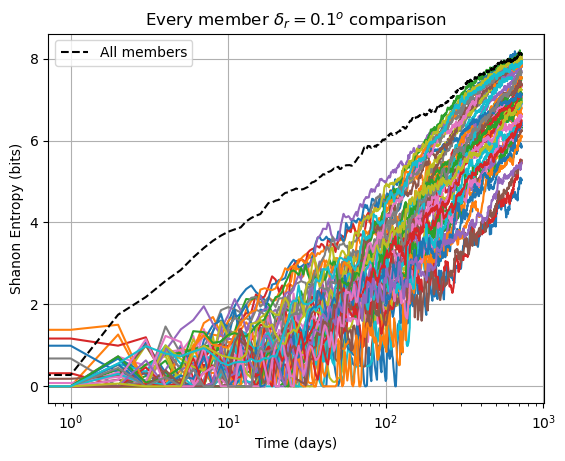

In [111]:
# for i, dt in enumerate(delta_t_array):
#     plt.plot(P_m['entropy'][i, :1300], label=f'{dt} hrs gap')
delta_r = 0.1

# for i, delta_r in enumerate(delta_r_ranges):
for member in range(1, 51):
    
    file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/{location}_spatial/P_dr{delta_r*100:03.0f}_m{member:03d}.zarr"
    P_m = xr.open_zarr(file_path)
    plt.plot(P_m['entropy'][:])
    
plt.semilogx(P_AX['entropy'][:], ls='--', color='black', label='All members')

plt.legend()
plt.ylabel('Shanon Entropy (bits)')
plt.xlabel('Time (days)')
plt.title(f'Every member $\\delta_r = ${delta_r:.1f}$^o$ comparison')
plt.grid()

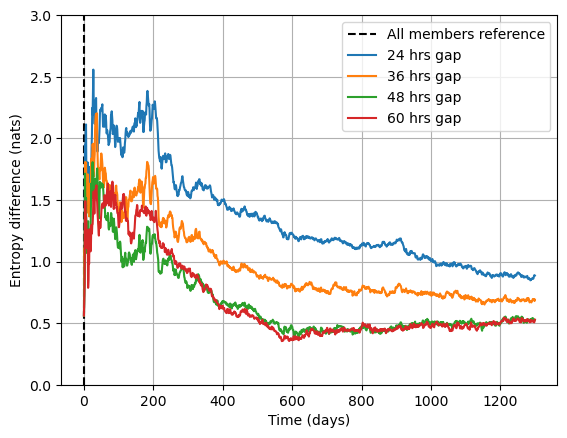

In [54]:
# plt.plot(P_AX['entropy'][0, :1300], ls='--', color='black', label='All members')

plt.axvline(0, color='black', ls='--', label="All members reference")
for i, dt in enumerate(delta_t_array):
    plt.plot(P_AX['entropy'][0, :1300] - P_m['entropy'][i, :1300], label=f'{dt} hrs gap')
    
plt.legend()
plt.ylabel('Entropy difference (nats)')
plt.xlabel('Time (days)')
plt.ylim(0, 3)
plt.grid()

In [97]:
def compute_h_timescales(h_ref, h_m):
    """
    Computes the timescales at which the entropy values in P_m reach the same or higher values as in P_AX.

    Parameters:
    - P_AX: DataFrame or similar structure with 'entropy' values for reference.
    - P_m: DataFrame or similar structure with 'entropy' values to compare.
    - i: Index to select the specific member in P_m for comparison.

    Returns:
    - h_timescales: A numpy array containing the computed timescales.
    """
    max_h = np.nanmax(h_m)
    h_range = np.linspace(0.1, max_h, 20)

    h_timescales = np.zeros_like(h_range)

    for j, h_i in enumerate(h_range):
        idx_ref = np.where(h_ref >= h_i)[0]
        idx_m = np.where(h_m >= h_i)[0]
        if len(idx_ref) > 0 and len(idx_m) > 0:
            h_timescales[j] = idx_m[0] - idx_ref[0]
        else:
            h_timescales[j] = np.nan  # Assign NaN if no matching index is found

    return h_timescales, h_range

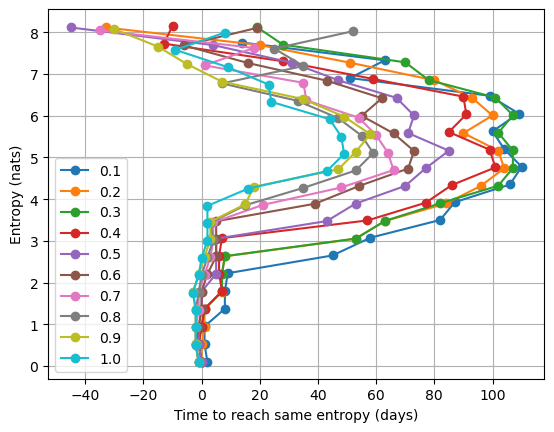

In [98]:
for i, delta_r in enumerate(delta_r_ranges):
    
    file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/{location}_spatial/P_dr{delta_r*100:03.0f}_m{member:03d}.zarr"
    P_m = xr.open_zarr(file_path)
    
    x, y =  compute_h_timescales(P_AX['entropy'], P_m['entropy'])
    plt.plot(x,y, marker='o', label=f'{delta_r}')

plt.grid()
plt.xlabel('Time to reach same entropy (days)')
plt.ylabel('Entropy (nats)')
plt.legend()

In [89]:
hex_grid = hexfunc.int_to_hex(P_m.hexint.values)
hexbin_grid = hexfunc.hexGrid(hex_grid, h3_res=3)

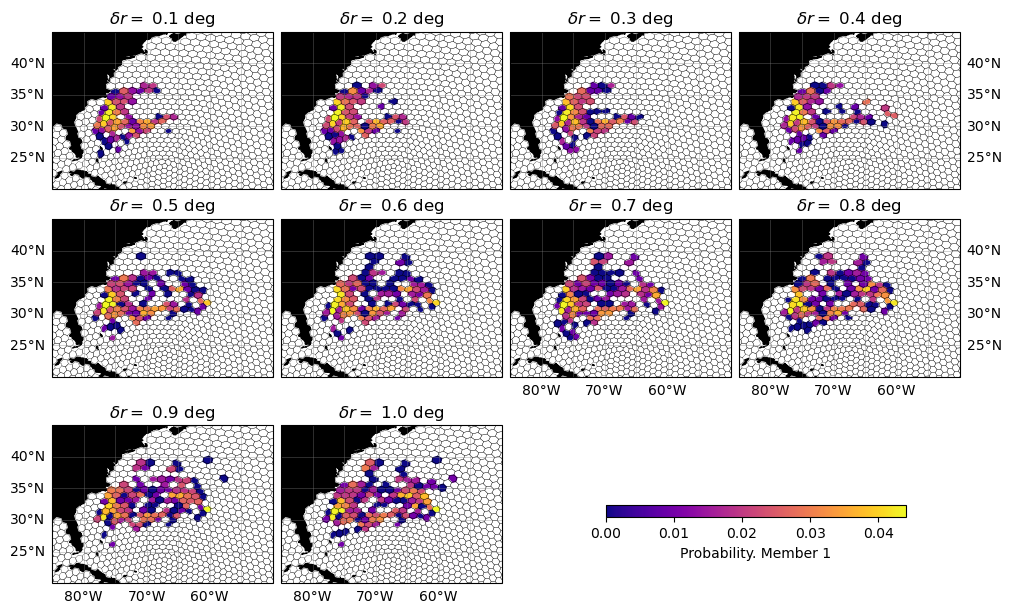

In [90]:
ncol = 4
nrow = 3
fig, axs = plt.subplots(ncols=ncol, nrows=nrow, figsize=(10, 6),
                       subplot_kw={'projection': cartopy.crs.PlateCarree()},
                       sharey=True, constrained_layout=True)

axs = axs.reshape(ncol*nrow)
t = 150

for i, delta_r in enumerate(delta_r_ranges):
    
    file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/{location}_spatial/P_dr{delta_r*100:03.0f}_m{member:03d}.zarr"
    P_m = xr.open_zarr(file_path)
    
    axs[i].set_extent([-85, -50, 20, 45], crs=cartopy.crs.PlateCarree())
    axs[i].add_feature(cartopy.feature.LAND, zorder=0, color='black')
    
    axs[i].set_title(f'$\\delta r =$ {delta_r} deg')
    gl = axs[i].gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True,
                         linewidth=0.5, color='gray', alpha=0.5)

    im = hexbin_grid.pcolorhex(P_m['probability'][:, t].values, ax=axs[i], cmap='plasma', draw_edges=True)
    
    
    if i in [1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19]:
        gl.left_labels = False

    if i < 6:
        gl.bottom_labels = False

    gl.top_labels = False
    gl.right_labels = False

    if i in [3, 7, 11, 15, 19]:
        gl.right_labels = True

for i in range(ncol*nrow - nrow + 1, ncol*nrow):
    axs[i].axis('off')

# ax[12].legend(handles=[h], loc='upper center', shadow=True)
# bar_ax = fig.add_axes([0.1, 0.07, 0.8, 0.02])
bar_ax = fig.add_axes([0.6, 0.15, 0.3, 0.02])
cbar = fig.colorbar(im, cax=bar_ax, orientation='horizontal', label=f'Probability. Member {member}')



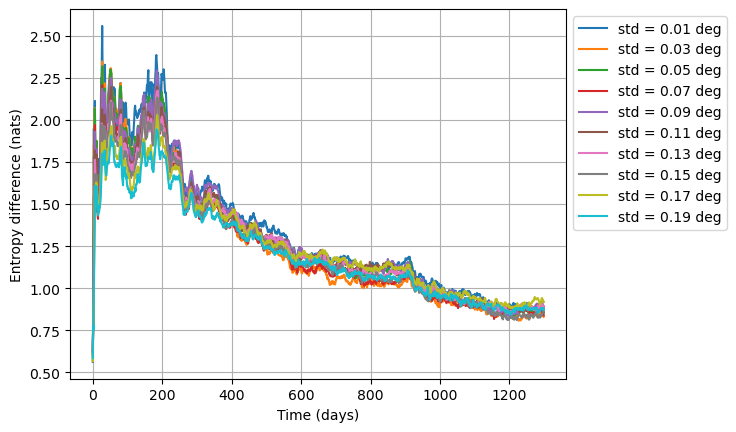

In [125]:
for i, std in enumerate(std_ranges[::2]):
    
    file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/{location}_coarse/P_std{std*100:03.0f}_m{member:03d}.zarr"
    P_m = xr.open_zarr(file_path)
    
    file_path_AX = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/{location}_coarse/P_std{std*100:03.0f}_all.zarr"
    P_AX = xr.open_zarr(file_path_AX)
    
    plt.plot(P_AX['entropy'][0, :1300] - P_m['entropy'][0, :1300], label=f'std = {std} deg')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel('Entropy difference (nats)')
plt.xlabel('Time (days)')
plt.grid()

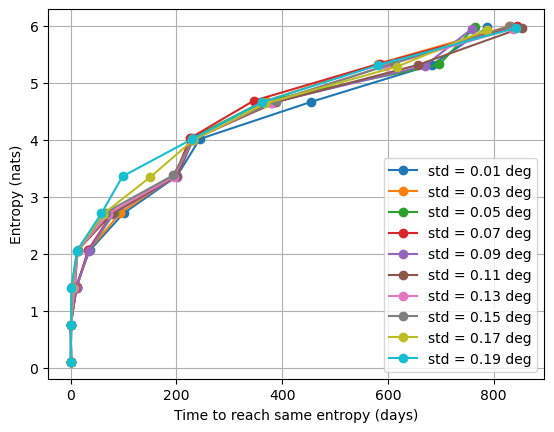

In [127]:
for i, std in enumerate(std_ranges[::2]):
    
    file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/{location}_coarse/P_std{std*100:03.0f}_m{member:03d}.zarr"
    P_m = xr.open_zarr(file_path)
    
    file_path_AX = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/{location}_coarse/P_std{std*100:03.0f}_all.zarr"
    P_AX = xr.open_zarr(file_path_AX)
    
    x, y =  compute_h_timescales(P_AX, P_m, 0)
    plt.plot(x,y, marker='o', label=f'std = {std} deg')

plt.grid()
plt.xlabel('Time to reach same entropy (days)')
plt.ylabel('Entropy (nats)')
plt.legend()

# New set of simulations SPATIAL

In [3]:
location = 'Cape_Hatteras'
member = 1
delta_r = 0.1

file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/{location}_spatial/P_dr{delta_r*100:03.0f}_m{member:03d}.zarr"
P_m = xr.open_zarr(file_path)

hex_grid = hexfunc.int_to_hex(P_m.hexint.values)
hexbin_grid = hexfunc.hexGrid(hex_grid, h3_res=3)


In [5]:
P_m['entropy']

<xarray.DataArray 'entropy' (time: 730)> Size: 6kB
dask.array<open_dataset-entropy, shape=(730,), dtype=float64, chunksize=(730,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int32 3kB 0 1 2 3 4 5 6 7 ... 723 724 725 726 727 728 729
Attributes:
    description:  Entropy values for each time step and observation time
    units:        bits

In [6]:
location = 'Cape_Hatteras'
N_members = 7
N_obs = len(P_m.time)
H = np.zeros((N_members, N_obs))
delta_r = 1.

for member in range(1,N_members+1):
    print(f"Member {member}")
    
    file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/{location}_spatial/P_dr{delta_r*100:03.0f}_m{member:03d}.zarr"
    P_m = xr.open_zarr(file_path)
    
    H[member-1, :] = P_m['entropy'].values

Member 1
Member 2
Member 3
Member 4
Member 5
Member 6
Member 7


Text(0.5, 1.0, 'Entropy from $\\delta r = 1.0$')

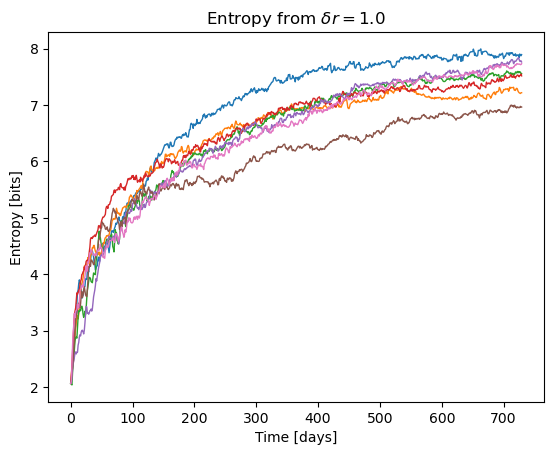

In [8]:
for i in range(7):
    plt.plot(H[i,:], lw=1)
    
plt.xlabel('Time [days]')
plt.ylabel('Entropy [bits]')
plt.title(f"Entropy from $\\delta r = {delta_r}$")

Member 1
Member 2
Member 3
Member 4
Member 5
Member 6
Member 7


Text(0.5, 1.0, 'Entropy from $\\delta r = 0.1$')

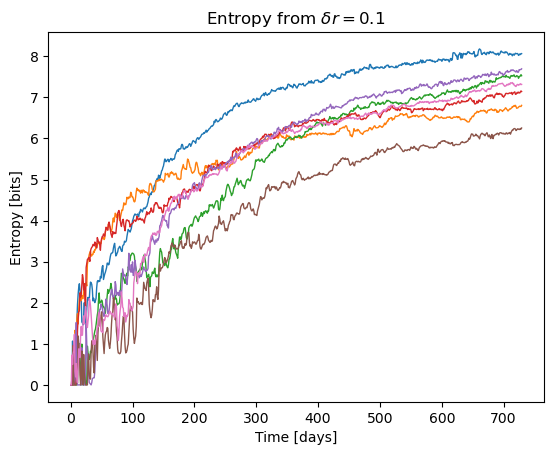

In [10]:
location = 'Cape_Hatteras'
N_members = 7
N_obs = len(P_m.time)
H = np.zeros((N_members, N_obs))
delta_r = 0.1

for member in range(1,N_members+1):
    print(f"Member {member}")
    
    file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/analysis/prob_distribution/{location}_spatial/P_dr{delta_r*100:03.0f}_m{member:03d}.zarr"
    P_m = xr.open_zarr(file_path)
    
    H[member-1, :] = P_m['entropy'].values
    
for i in range(7):
    plt.plot(H[i,:], lw=1)
    
plt.xlabel('Time [days]')
plt.ylabel('Entropy [bits]')
plt.title(f"Entropy from $\\delta r = {delta_r}$")